In [47]:
# ONLY RUN THIS CELL IF YOU NEED
# TO DOWNLOAD NLTK AND HAVE CONDA

# Uncomment the code below and run:

# !conda install nltk #This installs nltk
# import nltk # Imports the library
# nltk.download() #Download the necessary datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [3]:
df = pd.read_csv('sms.csv', sep=',', encoding = 'unicode_escape',names=["label", "message"])

In [4]:
df = df.loc[1:]

In [5]:
df

,label,message
1,ham,Hope you are having a good week. Just checking in
2,ham,K..give back my thanks.
3,ham,Am also doing in cbe only. But have to pay.
4,spam,"complimentary 4 STAR Ibiza Holiday or £10,000..."
5,spam,okmail: Dear Dave this is your final notice to...
6,ham,Aiya we discuss later lar... Pick u up at 4 is...
7,ham,Are you this much buzy
8,ham,Please ask mummy to call father
9,spam,Marvel Mobile Play the official Ultimate Spide...
10,ham,"fyi I'm at usf now, swing by the room whenever"


In [6]:
df.describe()

,label,message
count,5556,5556
unique,2,5153
top,ham,"Sorry, I'll call later"
freq,4809,30


In [7]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4809   4500                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
1,ham,Hope you are having a good week. Just checking in,49
2,ham,K..give back my thanks.,23
3,ham,Am also doing in cbe only. But have to pay.,43
4,spam,"complimentary 4 STAR Ibiza Holiday or £10,000...",150
5,spam,okmail: Dear Dave this is your final notice to...,161


### Basic Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

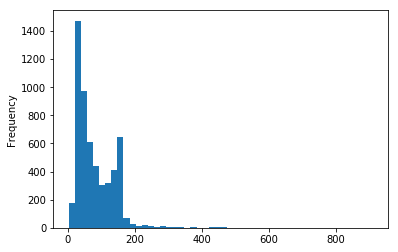

In [10]:
df['length'].plot(bins=50, kind='hist') 

In [11]:
df.length.describe()

count    5556.000000
mean       79.848092
std        59.184868
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [12]:
df[df['length'] == 2]['message'].iloc[0]

'Ok'

above is the min length message received out of the dataset.

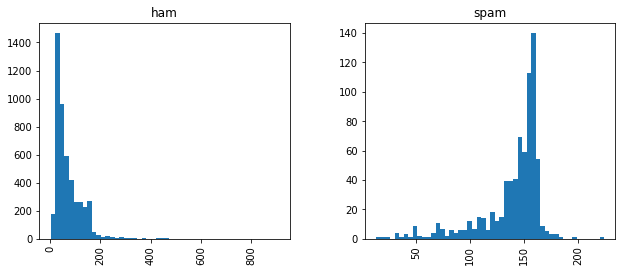

In [13]:
df.hist(column='length', by='label', bins=50,figsize=(10,4))
plt.show()

- from above we can say that span messages tend to have more characters.

### Text Pre-Processing

- all the data is in text format, time to convert into numerical features.

- methods to convert a corpus to a vector format

In [14]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [15]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [17]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

 - Now let's put both of these together in a function to apply it to our DataFrame later on:

In [19]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
df.head()

,label,message,length
1,ham,Hope you are having a good week. Just checking in,49
2,ham,K..give back my thanks.,23
3,ham,Am also doing in cbe only. But have to pay.,43
4,spam,"complimentary 4 STAR Ibiza Holiday or £10,000...",150
5,spam,okmail: Dear Dave this is your final notice to...,161


In [21]:
# Tokenization

In [22]:
# Check to make sure its working
df['message'].head(5).apply(text_process)

1                         [Hope, good, week, checking]
2                                [Kgive, back, thanks]
3                                     [also, cbe, pay]
4    [complimentary, 4, STAR, Ibiza, Holiday, £100...
5    [okmail, Dear, Dave, final, notice, collect, 4...
Name: message, dtype: object

In [23]:
# Show original dataframe
df.head()

,label,message,length
1,ham,Hope you are having a good week. Just checking in,49
2,ham,K..give back my thanks.,23
3,ham,Am also doing in cbe only. But have to pay.,43
4,spam,"complimentary 4 STAR Ibiza Holiday or £10,000...",150
5,spam,okmail: Dear Dave this is your final notice to...,161


In [24]:
# Normalization

In [25]:
# stemming or part of speech

In [26]:
# Vectorization

current state - list of tokens
- so convert to vector

### Vectorization

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

# Print total number of vocab words
print (len(bow_transformer.vocabulary_))

11339


- Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer:

In [30]:
message4 = df['message'][3]
print (message4)

Am also doing in cbe only. But have to pay.


In [31]:
# Vector representation

In [32]:
bow4 = bow_transformer.transform([message4])
print (bow4)
print (bow4.shape)

  (0, 4607)	1
  (0, 5347)	1
  (0, 8707)	1
(1, 11339)


- This means that there are 3 unique words in message number 4 (after removing common stop words). 3 of them appear once.

In [33]:
print (bow_transformer.get_feature_names()[4607])
print (bow_transformer.get_feature_names()[8707])

also
pay


Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [34]:
messages_bow = bow_transformer.transform(df['message'])
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5556, 11339)
Amount of Non-Zero occurences:  49970
sparsity: 0.08%


After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
# eg
tfidf4 = tfidf_transformer.transform(bow4)
print (tfidf4)

  (0, 8707)	0.539509191203041
  (0, 5347)	0.6872609255231861
  (0, 4607)	0.4864177760489991


In [36]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.06888026925411
8.52420138461181


- To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [37]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print (messages_tfidf.shape)

(5556, 11339)


### Training a model

In [38]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['label'])

In [39]:
print ('predicted:', spam_detect_model.predict(tfidf4)[0])
print ('expected:', df.label[3])

predicted: ham
expected: ham


### Evaluation of model

In [40]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print (all_predictions)

['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham']


In [41]:
from sklearn.metrics import classification_report
print (classification_report(df['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4809
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5556
   macro avg       0.99      0.92      0.95      5556
weighted avg       0.98      0.98      0.98      5556



In [42]:
from sklearn.model_selection import train_test_split


msg_train, msg_test, label_train, label_test = \
train_test_split(df['message'], df['label'], test_size=0.3)

print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

3889 1667 5556


The test size is 30% of the entire dataset (1667 messages out of total 5556), and the training is the rest (3889 out of 5556). Note the default split is 30/70.

### Creating a Data Pipeline

In [43]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [44]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001B6835E4840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [45]:
predictions = pipeline.predict(msg_test)

In [46]:
print (classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1526
        spam       0.65      1.00      0.79       141

   micro avg       0.95      0.95      0.95      1667
   macro avg       0.82      0.97      0.88      1667
weighted avg       0.97      0.95      0.96      1667



- Above is the highest precision,recall & f1 score in classifying spam & ham in this case achieved by me for this dataset.